Install yolo v8

In [2]:
# # Pip install method (recommended)
# %pip install ultralytics==8.0.196
# %pip install -U ultralytics
# %pip install paddlepaddle --index-url https://pypi.tuna.tsinghua.edu.cn/simple
# %pip install "paddleocr>=2.7"  -f --upgrade "PyMuPDF>=1.21.0"

In [3]:
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import ultralytics

import os
from IPython.display import display, Image
import matplotlib.pyplot as plt
import cv2

In [4]:
from IPython import display
display.clear_output()
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 14931MiB)
Setup complete ✅ (4 CPUs, 14.6 GB RAM, 183.3/193.6 GB disk)


In [5]:
# !pip install roboflow


In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="aFwxF7XuoAUHWjyLZOyY")
project = rf.workspace("electricity-bills").project("bills_electricity")
version = project.version(5)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [7]:
#!yolo task=detect mode=train model=yolov8l.pt data='/home/ubuntu/workspace/utility/2_uu/Bills_Electricity-5/data.yaml' epochs=34 plots=True

In [8]:
#!yolo task=detect mode=train model=yolov8x.pt data='/home/ubuntu/workspace/utility/2_uu/Bills_Electricity-5/data.yaml' epochs=40 plots=True

In [9]:
#!yolo task=detect mode=train model=yolov8l.pt data='/home/ubuntu/workspace/utility/Bills_Electricity-4/data.yaml' epochs=40 plots=True

In [10]:

#!yolo task=detect mode=train model=yolov8l.pt data='/home/ubuntu/workspace/utility/Bills_Electricity-3/data.yaml' epochs=40 plots=True

In [11]:
#!yolo task=detect mode=val model="/home/ubuntu/workspace/utility/runs/detect/train14/weights/best.pt" data="/home/ubuntu/workspace/utility/2_uu/Bills_Electricity-4/data.yaml"

In [12]:
#!yolo task=detect mode=predict iou=0.5 model="/home/ubuntu/workspace/utility/2_uu/train_final/weights/best.pt" source="/home/ubuntu/workspace/utility/2_uu/Bills_Electricity-5/train/images" save=True


Annotate the images:

In [13]:
image_path="/home/ubuntu/workspace/utility/2_uu/Bills_Electricity-5/train/images/DEETA_jpg.rf.3133ce1ebe94a53a7f83f9d7abaec181.jpg"

In [23]:
model = YOLO("/home/ubuntu/workspace/utility/2_uu/train_final/weights/best.pt")

In [24]:
results=model(image_path)

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.00 MiB. GPU 

In [ ]:
boards_name=[]
for i in range(0,5):
    boards_name.append(results[0].names[i])
    #print(boards_name)


In [ ]:
for result in results:
        boxes = results[0].boxes.to().cpu().numpy()
        for box in boxes:
            cls = int(box.cls[0])
            class_name = model.names[cls]
            conf = int(box.conf[0] * 100)
            bx = box.xyxy.tolist()
            polygon_points = None
            print(class_name)

CUSTOMER_ID
BOARD_ADANI
Resi_address
Name
Date


In [ ]:
# import numpy as np
# for result in results:    
#     o_title=[]
#     for box in boxes:
#         cls = int(box.cls[0])
#         class_name = model.names[cls]
#         o_title.append(class_name)
#         title=list(set(o_title))
#     print(title)

In [ ]:
#len(title)

In [ ]:
# boxes = results[0].boxes.to().cpu().numpy()
# cls = int(boxes.cls[0])
# class_name = model.names[cls]
# cls

In [ ]:
import pandas as pd

def yolov8_results_to_df(result, model, device='cpu'):
    results_list = []
    for results in result:
        boxes = results.boxes.to(device).cpu().numpy()
        for box in boxes:
            cls = int(box.cls[0])
            path = results.path
            class_name = model.names[cls]
            conf = int(box.conf[0] * 100)
            bx = box.xyxy.tolist()
            polygon_points = None

            if results.masks is not None and len(results.masks) > 0:
                polygon_points = results.masks[0].xy[0]
                if len(polygon_points) > 1:
                    polygon_points = [polygon_points]

            df = pd.DataFrame({'path': [path], 'class_name': [class_name], 'class_id': [cls], 'confidence': [conf], 'box_coord': [bx], 'polygon_points': [polygon_points]})
            results_list.append(df)

    if not results_list:
        return pd.DataFrame()

    df = pd.concat(results_list).reset_index(drop=True)

    return df

# df = yolov8_results_to_df(result, model1,device='cpu')
# unique_boxes_df = df[['class_id', 'box_coord']].drop_duplicates()

# print(unique_boxes_df)


In [ ]:
df=yolov8_results_to_df(results,model)
df

,path,class_name,class_id,confidence,box_coord,polygon_points
0,/home/ubuntu/workspace/utility/2_uu/Bills_Elec...,CUSTOMER_ID,5,89,"[[149.0001220703125, 232.8440704345703, 207.55...",None
1,/home/ubuntu/workspace/utility/2_uu/Bills_Elec...,BOARD_ADANI,0,88,"[[450.0874328613281, 11.8765230178833, 543.343...",None
2,/home/ubuntu/workspace/utility/2_uu/Bills_Elec...,Resi_address,8,81,"[[54.100746154785156, 118.14522552490234, 215....",None
3,/home/ubuntu/workspace/utility/2_uu/Bills_Elec...,Name,7,75,"[[52.891090393066406, 105.57289123535156, 180....",None
4,/home/ubuntu/workspace/utility/2_uu/Bills_Elec...,Date,6,65,"[[334.29632568359375, 174.69314575195312, 409....",None


In [ ]:
# #After selecting the class_ids with the highest confidence and removing any duplicate entries there
new_df=df.loc[df.groupby('class_id')['confidence'].idxmax()]
new_df


,path,class_name,class_id,confidence,box_coord,polygon_points
1,/home/ubuntu/workspace/utility/2_uu/Bills_Elec...,BOARD_ADANI,0,88,"[[450.0874328613281, 11.8765230178833, 543.343...",None
0,/home/ubuntu/workspace/utility/2_uu/Bills_Elec...,CUSTOMER_ID,5,89,"[[149.0001220703125, 232.8440704345703, 207.55...",None
4,/home/ubuntu/workspace/utility/2_uu/Bills_Elec...,Date,6,65,"[[334.29632568359375, 174.69314575195312, 409....",None
3,/home/ubuntu/workspace/utility/2_uu/Bills_Elec...,Name,7,75,"[[52.891090393066406, 105.57289123535156, 180....",None
2,/home/ubuntu/workspace/utility/2_uu/Bills_Elec...,Resi_address,8,81,"[[54.100746154785156, 118.14522552490234, 215....",None


In [ ]:
points=[]
for point in new_df['box_coord']:
  points.append(point[0])

print(points)

[[450.0874328613281, 11.8765230178833, 543.3434448242188, 44.20289611816406], [149.0001220703125, 232.8440704345703, 207.55206298828125, 256.27032470703125], [334.29632568359375, 174.69314575195312, 409.7978210449219, 183.80801391601562], [52.891090393066406, 105.57289123535156, 180.8131561279297, 115.69932556152344], [54.100746154785156, 118.14522552490234, 215.88336181640625, 141.5498809814453]]


In [ ]:
boards_name

['BOARD_ADANI',
 'BOARD_BESCOM',
 'BOARD_BSES',
 'BOARD_KOLKATA',
 'BOARD_MAHAVITRAN']

In [ ]:
title=[]
for na in new_df['class_name']:
  title.append(na)

print(title)

['BOARD_ADANI', 'CUSTOMER_ID', 'Date', 'Name', 'Resi_address']


In [ ]:
#a=array_intersect(boards_name,title)
board_if_exists=list((set(boards_name)).intersection(set((title))))
print(board_if_exists)

['BOARD_ADANI']


In [ ]:
if board_if_exists==[]:
    board_if_exists="COULDN'T DETECT THE BOARD"

In [ ]:
import tensorflow as tf
tf.convert_to_tensor(points)

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[     450.09,      11.877,      543.34,      44.203],
       [        149,      232.84,      207.55,      256.27],
       [      334.3,      174.69,       409.8,      183.81],
       [     52.891,      105.57,      180.81,       115.7],
       [     54.101,      118.15,      215.88,      141.55]], dtype=float32)>

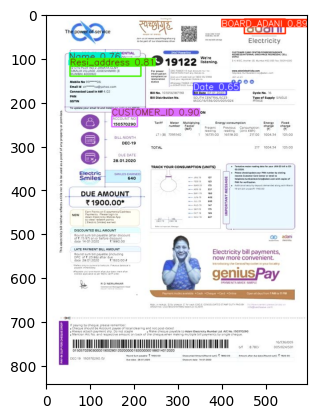

In [ ]:
image_ann=results[0].plot()
plt.imshow(image_ann)
plt.show()

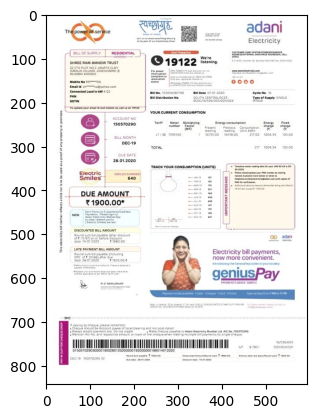

In [ ]:
import cv2
#image_actual = cv2.imread(image_path)
image_actual=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
plt.imshow(image_actual)
plt.show()

In [ ]:
# Iterate over each bounding box
for i, box in enumerate(points):
    # Extract coordinates and convert to integers
    x1, y1, x2, y2 = [int(coord) for coord in box]

    # Ensure coordinates are within the image dimensions
    height, width, _ = image_actual.shape
    x1, x2 = min(max(x1, 0), width), min(max(x2, 0), width)
    y1, y2 = min(max(y1, 0), height), min(max(y2, 0), height)

    x1=int(x1-(x1*1)/100)
    x2=int(x2+(x2*1)/100)
    y1=int(y1-(y1*0.75)/100)
    y2=int(y2+(y2*0.75)/100)

    

    # Slice the image
    img_slice = image_actual[y1:y2, x1:x2]

    # Plot the image slice
    plt.figure(figsize=(4, 4))
    plt.imshow(img_slice)
    #plt.title(f"Box: ({x1}, {y1}) to ({x2}, {y2})")
    plt.axis('off')  # Hide axes for better visualization


    # Save the image
    save_path = os.path.join("/home/ubuntu/workspace/utility/Cropped", f'image_{i}.png')
    plt.savefig(save_path)

    plt.close()  # Close the plot to release memory

print("Images saved successfully.")


Images saved successfully.


In [ ]:
import matplotlib.pyplot as plt # type: ignore
from PIL import Image
import cv2
import numpy as np

In [ ]:
# from ultralytics import YOLO
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# import os

In [ ]:
#pip install paddlepaddle paddleocr


In [ ]:
img_path="/home/ubuntu/workspace/utility/Cropped/image_0.png"

In [ ]:
from paddleocr import PaddleOCR,draw_ocr
ocr = PaddleOCR(use_angle_cls=True, lang='en', show_log=True, ocr_version='PP-OCRv4') # Initialize the ocr object again.

#img_path="/content/drive/MyDrive/bangalore_folder/blr-1/cropped/image_1.png"



In [ ]:
import logging
from paddleocr import PaddleOCR

# Set up PaddleOCR
# ocr = PaddleOCR()
logging.getLogger('ppocr').setLevel(logging.INFO)

In [ ]:

result = ocr.ocr(img_path,det=True, rec= True)
print(result)

[[[[[80.0, 165.0], [328.0, 162.0], [329.0, 252.0], [81.0, 254.0]], ('adani', 0.9985367059707642)]]]


In [ ]:
# import matplotlib.pyplot as plt
# import cv2
# fig=plt.figure(figsize=(5,5))
# image_cropped=plt.imread(img_path)
# plt.imshow(image_cropped)
# plt.show()


In [ ]:

# # draw result
# from PIL import Image
# # result = result[0]
# image = Image.open(img_path).convert('RGB')
# result[0]


In [ ]:
# im_path="/content/drive/MyDrive/runs_Mahavitran/detect/val/confusion_matrix.png"
# plt.imshow(plt.imread(im_path))
# plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt
image_actual = cv2.imread(image_path)
plt_figure = plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(image_actual)
save_path = os.path.join("/home/ubuntu/workspace/utility/tbc", 'actual.png')
plt.savefig(save_path)
plt.close()  # Close the plot to release memory

print("Images saved successfully.")
plt.show()

Images saved successfully.


In [ ]:
import cv2
import matplotlib.pyplot as plt
image_ann=image_ann=results[0].plot()
plt.axis('off')
plt.imshow(image_ann)
save_path=os.path.join("/home/ubuntu/workspace/utility/tbc", 'ann.png')
plt.savefig(save_path)
plt.close()  # Close the plot to release memory

print("Images saved successfully.")
plt.show()



Images saved successfully.


In [ ]:
import matplotlib.pyplot as plt
#image_cr="/content/drive/MyDrive/mumbai_Adani/adani-1/image_1.png"
image_cropped=plt.imread(img_path)
plt.axis('off')
plt.imshow(image_cropped)

save_p=os.path.join("/home/ubuntu/workspace/utility/tbc", 'cropped.png')
plt.savefig(save_p)
plt.close()
print("Images saved successfully.")


plt.show()

Images saved successfully.


In [ ]:
# texts=[]
# for idx in range(len(result)):
#     res = result[idx]

#     for line in res:
#         text = line[1][0]  # Extract the recognized text
#         texts.append(text)
#     print(" ".join(texts))


In [ ]:
# sasa=plt.imread("/home/ubuntu/workspace/utility/Cropped/image_4.png")
# plt.imshow(sasa)

In [ ]:
arr = []
if (len(title)>4):
    for i in range(0, 5):
        img_path = f"/home/ubuntu/workspace/utility/Cropped/image_{i}.png"
        result = ocr.ocr(img_path, det=True, rec=True)

        texts = []  # Initialize the texts list outside of the loop over result
        for idx in range(len(result)):
            res = result[idx]
            for line in res:
                text = line[1][0]  # Extract the recognized text
                texts.append(text)
                full_line=" ".join(texts)

        print(full_line)  # Join texts with spaces, print, and add an extra newline
        arr.append(full_line)

    # Filter out None elements from arr
    arr = [texts for texts in arr if texts is not None]

adani
AOCOUNTNC 150570290
B0010T-01.2020
SHREE RAM MANDIR TRUST
22 CTS PLOTNO 2JANATACLNY ISMALIA VILLAGE JOGESHWARI(E MUMBAI400060


In [ ]:
len(title)

5

In [ ]:
arr = []
if (len(title)==4):
    for i in range(0, 4):
        img_path = f"/home/ubuntu/workspace/utility/Cropped/image_{i}.png"
        result = ocr.ocr(img_path, det=True, rec=True)

        texts = []  # Initialize the texts list outside of the loop over result
        for idx in range(len(result)):
            res = result[idx]
            for line in res:
                text = line[1][0]  # Extract the recognized text
                texts.append(text)
                full_line=" ".join(texts)

        print(full_line)  # Join texts with spaces, print, and add an extra newline
        arr.append(full_line)

    # Filter out None elements from arr
    arr = [texts for texts in arr if texts is not None]

else:
    for i in range(0, 5):
        img_path = f"/home/ubuntu/workspace/utility/Cropped/image_{i}.png"
        result = ocr.ocr(img_path, det=True, rec=True)

        texts = []  # Initialize the texts list outside of the loop over result
        for idx in range(len(result)):
            res = result[idx]
            for line in res:
                text = line[1][0]  # Extract the recognized text
                texts.append(text)
                full_line=" ".join(texts)

        print(full_line)  # Join texts with spaces, print, and add an extra newline
        arr.append(full_line)

    # Filter out None elements from arr
    arr = [texts for texts in arr if texts is not None]
    

adani
AOCOUNTNC 150570290


B0010T-01.2020
SHREE RAM MANDIR TRUST
22 CTS PLOTNO 2JANATACLNY ISMALIA VILLAGE JOGESHWARI(E MUMBAI400060


for 5 images do this



In [ ]:
# arr = []
# if (len(title)==5):
#     for i in range(0, 5):
#         img_path = f"/home/ubuntu/workspace/utility/Cropped/image_{i}.png"
#         result = ocr.ocr(img_path, det=True, rec=True)

#         texts = []  # Initialize the texts list outside of the loop over result
#         for idx in range(len(result)):
#             res = result[idx]
#             for line in res:
#                 text = line[1][0]  # Extract the recognized text
#                 texts.append(text)
#                 full_line=" ".join(texts)

#         print(full_line)  # Join texts with spaces, print, and add an extra newline
#         arr.append(full_line)

#     # Filter out None elements from arr
#     arr = [texts for texts in arr if texts is not None]

In [ ]:
arr

['adani',
 'AOCOUNTNC 150570290',
 'B0010T-01.2020',
 'SHREE RAM MANDIR TRUST',
 '22 CTS PLOTNO 2JANATACLNY ISMALIA VILLAGE JOGESHWARI(E MUMBAI400060']

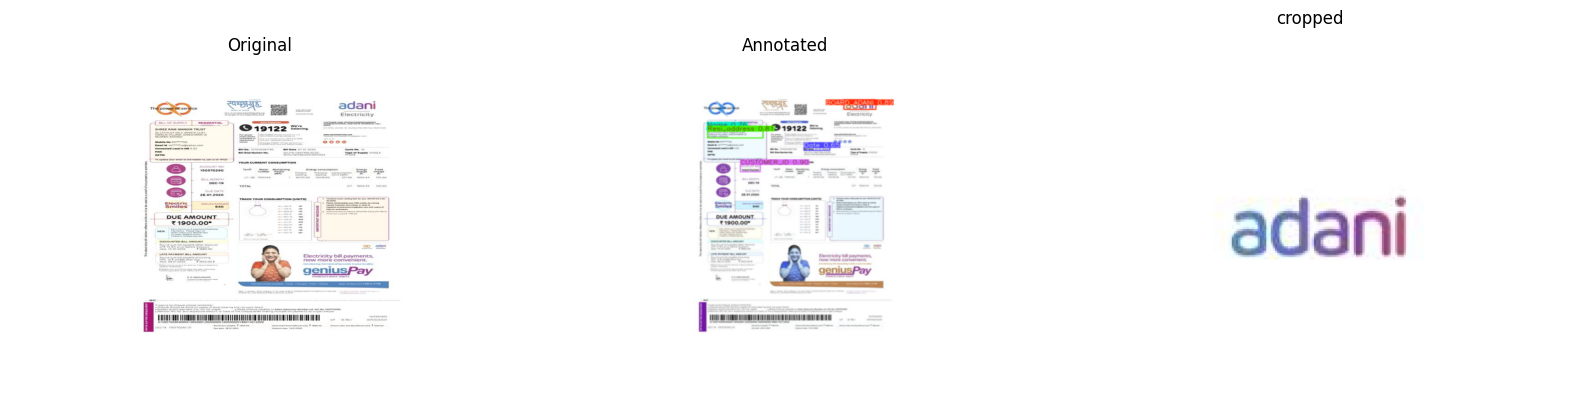

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Function to resize an image to a target size
def resize_image(image, target_size):
    return cv2.resize(image, target_size)

# Set the target size for all images (width, height)
target_size = (1400,900)  # Adjust as needed

# Read images
Image1 = plt.imread("/home/ubuntu/workspace/utility/tbc/actual.png")
Image2 = cv2.imread("/home/ubuntu/workspace/utility/tbc/ann.png")
Image3 = cv2.imread("/home/ubuntu/workspace/utility/tbc/cropped.png")

# Resize images
Image1 = resize_image(Image1, target_size)
Image2 = resize_image(Image2, target_size)
# Image3 = resize_image(Image3, target_size)

# Convert images from BGR to RGB format for correct color display
Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)
Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB)

# Set the figure size
fig = plt.figure(figsize=(20, 40))

# Define the number of rows and columns for subplots
rows = 1
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title("Original")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("Annotated")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.axis('off')
plt.title("cropped")

# Adjust layout for symmetry
plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.05)

# Show the plot
plt.show()


In [ ]:
print("\n".join(arr)+ "\n")

texts.append("\n")

adani
AOCOUNTNC 150570290
B0010T-01.2020
SHREE RAM MANDIR TRUST
22 CTS PLOTNO 2JANATACLNY ISMALIA VILLAGE JOGESHWARI(E MUMBAI400060



In [ ]:
len(title)

5

In [ ]:
import pandas as pd
resultlist=[]
if len(title)==4:
    print("Length=4")


    df=pd.DataFrame({
        title[0] :[arr[0]]
        ,title[1] :[arr[1]]
        ,title[2] :[arr[2]]
        ,title[3] :[arr[3]]
                    })

    resultlist.append(df)


#for printing the data in df form

In [ ]:
if len(title)==5:
    print("Length=5")

    df=pd.DataFrame({
        title[0] :[arr[0]]
        ,title[1] :[arr[1]]
        ,title[2] :[arr[2]]
        ,title[3] :[arr[3]]
        ,title[4] :[arr[4]]
                    })

    resultlist.append(df)

Length=5


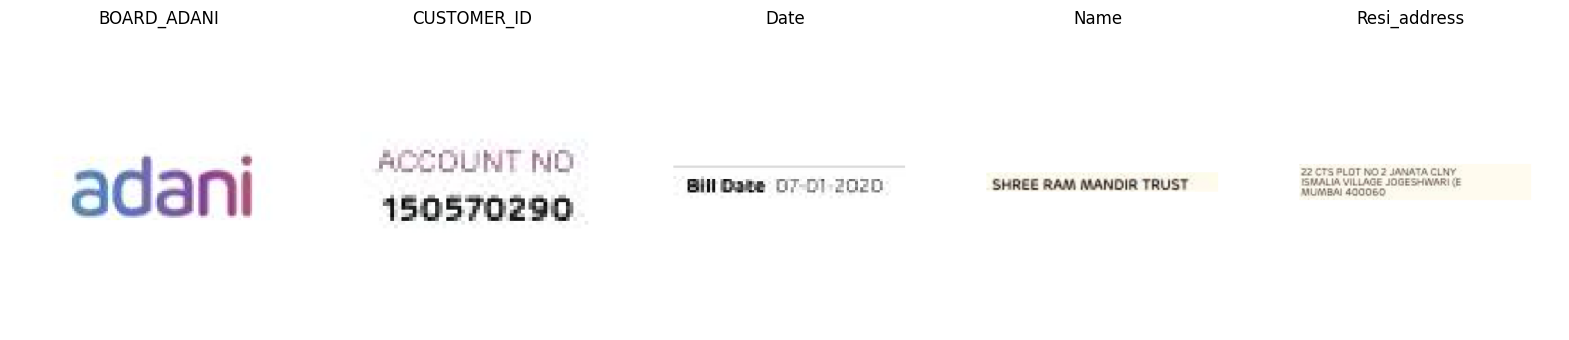

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Function to resize an image to a target size
def resize_image(image, target_size):
    return cv2.resize(image, target_size)

# Set the target size for all images (width, height)
target_size = (1400,900)  # Adjust as needed

# Read images
Image1 = cv2.imread("/home/ubuntu/workspace/utility/Cropped/image_0.png")
Image2 = cv2.imread("/home/ubuntu/workspace/utility/Cropped/image_1.png")
Image3 = cv2.imread("/home/ubuntu/workspace/utility/Cropped/image_2.png")
Image4 = cv2.imread("/home/ubuntu/workspace/utility/Cropped/image_3.png")
if len(title)==5:
    Image5 = cv2.imread("/home/ubuntu/workspace/utility/Cropped/image_4.png")


# Convert images from BGR to RGB format for correct color display
Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)
Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB)
Image4 =  cv2.cvtColor(Image4,cv2.COLOR_BGR2RGB)
if len(title)==5:
    Image5 =  cv2.cvtColor(Image5,cv2.COLOR_BGR2RGB)

# Set the figure size
fig = plt.figure(figsize=(20, 40))

# Define the number of rows and columns for subplots
rows = 1
columns = len(title)

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title(title[0])

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title(title[1])

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.axis('off')
plt.title(title[2])


fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.axis('off')
plt.title(title[3])

if(len(title)>4):
    fig.add_subplot(rows, columns, 5)
    plt.imshow(Image5)
    plt.axis('off')
    plt.title(title[4])

# Adjust layout for symmetry
plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.05)

# Show the plot
plt.show()


In [ ]:
df

,BOARD_ADANI,CUSTOMER_ID,Date,Name,Resi_address
0,adani,AOCOUNTNC 150570290,B0010T-01.2020,SHREE RAM MANDIR TRUST,22 CTS PLOTNO 2JANATACLNY ISMALIA VILLAGE JOGE...


In [ ]:
#BOARD_OF_BILL=list(board_if_exists)[0]

In [ ]:
if board_if_exists!=[]:
    board_if_exists=board_if_exists[0]

In [ ]:
date=df['Date'].iloc[0]
ele=[i for i in date if i.isalpha()]
list(date)

print(date)



B0010T-01.2020


In [ ]:

def extract_details(image):
    data  = dict()

    data['Board'] = board_if_exists

    data['name'] = df['Name'].iloc[0]
    
    data['address'] = df['Resi_address'].iloc[0]
    
    data['Customer_id'] = df['CUSTOMER_ID'].iloc[0]

    data['Date'] = df['Date'].iloc[0]
    
    return data

    
    

In [ ]:
image = ''
result = extract_details(image)

In [ ]:
extract_details(image)

{'Board': 'BOARD_ADANI',
 'name': 'SHREE RAM MANDIR TRUST',
 'address': '22 CTS PLOTNO 2JANATACLNY ISMALIA VILLAGE JOGESHWARI(E MUMBAI400060',
 'Customer_id': 'AOCOUNTNC 150570290',
 'Date': 'B0010T-01.2020'}